<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Comparing Object and Truth Tables</b> <br>
Last verified to run on 2021-06-27 with LSST Science Pipelines release w_2021_25 <br>
Contact author: Jeff Carlin <br>
Target audience: All DP0 delegates. <br>
Container Size: medium <br>
Questions welcome at <a href="https://community.lsst.org/c/support/dp0">community.lsst.org/c/support/dp0</a> <br>
Find DP0 documentation and resources at <a href="https://dp0-1.lsst.io">dp0-1.lsst.io</a> <br>

### Learning Objectives

In this short tutorial, users will learn how to extract data from the DP0.1 `Object` table and the `Truth-Match` table. We will them merge these two catalogs to enable comparison of the recovered (measured) properties (e.g., fluxes, positions, magnitudes, etc.) to the simulated values that were assigned to each object when creating the DC2 simulations.

More information about the DC2 simulations that make up DP0.1 can be found in [the DC2 Data Release Note](https://ui.adsabs.harvard.edu/abs/2021arXiv210104855L/abstract).

### Set Up

In [1]:
# What version of the Stack are we using?
! echo $IMAGE_DESCRIPTION
! eups list -s | grep lsst_distrib

Recommended (Weekly 2021_25)
lsst_distrib          21.0.0-3-gc37e2ab+2186fb90a2 	w_2021_25 current setup


### 1. Import Common Python Libraries

The [`matplotlib`](https://matplotlib.org/), [`numpy`](http://www.numpy.org/), [`pandas`](https://pandas.pydata.org/docs/), and [`astropy`](http://www.astropy.org/) libraries are widely used Python libraries for plotting, scientific computing, and astronomical data analysis. We will use these packages below, including the `matplotlib.pyplot` plotting sublibrary.

In [2]:
# allow for matplotlib to create inline plots in our notebook
%matplotlib inline
import pandas                        # imports the pandas data analysis tools
import matplotlib.pyplot as plt      # imports matplotlib.pyplot as plt

To access tables, we will use the TAP service in a similar manner to what we showed in the [Intro to DP0 notebook](https://github.com/rubin-dp0/tutorial-notebooks/blob/main/01_Intro_to_DP0_Notebooks.ipynb), and explored further in the [TAP tutorial notebook](https://github.com/rubin-dp0/tutorial-notebooks/blob/main/02_Intermediate_TAP_Query.ipynb). See those notebooks for more details.

In [3]:
# Set up some options, and import a couple more tools we will need:
pandas.set_option('display.max_rows', 200)

# from rubin_jupyter_utils.lab.notebook import get_catalog, retrieve_query
from rubin_jupyter_utils.lab.notebook import get_tap_service

# Deprecated
# service = get_catalog()
service = get_tap_service()

Patching auth into notebook.base.handlers.IPythonHandler(notebook.base.handlers.AuthenticatedHandler) -> IPythonHandler(jupyterhub.singleuser.mixins.HubAuthenticatedHandler, notebook.base.handlers.AuthenticatedHandler)


### 2. Loading tables with TAP

What tables are available?

In [4]:
results = service.search("SELECT description,\
                          table_name FROM TAP_SCHEMA.tables")
results_tab = results.to_table()
results_tab

description,table_name
str512,str64
"Forced photometry measurements for objects detected in the coadded images, at the locations defined by the position table. (747 columns)",dp01_dc2_catalogs.forced_photometry
The object table from the DESC DC2 simulated sky survey as described in arXiv:2101.04855. Includes astrometric and photometric parameters for objects detected in coadded images. (137 columns),dp01_dc2_catalogs.object
"Select astrometry-related parameters for objects detected in the coadded images, such as coordinates, footprints, patch/tract information, and deblending parameters. (29 columns)",dp01_dc2_catalogs.position
"Measurements for objects detected in the coadded images, including photometry, astrometry, shape, deblending, model fits, and related background and flag parameters. This table joined with the position table is very similar to the object table, but with additional columns. (236 columns)",dp01_dc2_catalogs.reference
The truth-match table for the DESC DC2's object table as described in arXiv:2101.04855. Includes the noiseless astrometric and photometric parameters and the best matches to the object table. (30 columns),dp01_dc2_catalogs.truth_match
description of columns in this tableset,tap_schema.columns
description of foreign key columns in this tableset,tap_schema.key_columns
description of foreign keys in this tableset,tap_schema.keys
description of schemas in this tableset,tap_schema.schemas


For our analysis, let's choose the Object table, `dp01_dc2_catalogs.object`, and then we will compare the measurements from this table to the "truth" values from `dp01_dc2_catalogs.truth_match`.

For later reference, let's print out the table schema (i.e., the list of columns) for each of them:

In [5]:
# Object table:

results = service.search("SELECT column_name, datatype, description,\
                          unit from TAP_SCHEMA.columns\
                          WHERE table_name = 'dp01_dc2_catalogs.object'")
# Note that we use the .to_pandas() method here so that all rows will display.
#   Astropy will truncate the table for display, whereas we set the maximum number of 
#   rows for pandas to display to 200 in a cell above.
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,blendedness,double,measure of how flux is affected by neighbors (...,
1,clean,boolean,True if the source has no flagged pixels and i...,
2,cModelFlux_flag_g,boolean,Flag for issues with cModelFlux_flag_<band>,
3,cModelFlux_flag_i,boolean,Flag for issues with cModelFlux_flag_<band>,
4,cModelFlux_flag_r,boolean,Flag for issues with cModelFlux_flag_<band>,
5,cModelFlux_flag_u,boolean,Flag for issues with cModelFlux_flag_<band>,
6,cModelFlux_flag_y,boolean,Flag for issues with cModelFlux_flag_<band>,
7,cModelFlux_flag_z,boolean,Flag for issues with cModelFlux_flag_<band>,
8,cModelFlux_g,double,composite model (CModel) flux in _<band>,
9,cModelFlux_i,double,composite model (CModel) flux in _<band>,


In [6]:
# Truth-match table

results = service.search("SELECT column_name, datatype, description,\
                          unit from TAP_SCHEMA.columns\
                          WHERE table_name = 'dp01_dc2_catalogs.truth_match'")
results_tab = results.to_table()
results_tab

column_name,datatype,description,unit
str64,str64,str512,str64
cosmodc2_hp,long,Healpix ID in cosmoDC2 (for galaxies only; -1 for stars and SNe),
cosmodc2_id,long,Galaxy ID in cosmoDC2 (for galaxies only; -1 for stars and SNe),
dec,double,Declination,deg
flux_g,float,Static flux value in g,nJy
flux_g_noMW,float,"Static flux value in g, without Milky Way extinction (i.e., dereddened)",nJy
flux_i,float,Static flux value in i,nJy
flux_i_noMW,float,"Static flux value in i, without Milky Way extinction (i.e., dereddened)",nJy
flux_r,float,Static flux value in r,nJy
flux_r_noMW,float,"Static flux value in r, without Milky Way extinction (i.e., dereddened)",nJy


For this exploration, we will select a small region of sky around a random RA, Dec position. The following two cells read data centered on (RA, Dec) = (62.0, -37.0) degrees, within a radius of 0.1 degrees, for first the Object table, then the Truth-Match table. Note that we are selecting only a subset of the columns seen in the schema above. You can add or remove columns as you wish.

Note that for the Object table we select all objects within the cone-shaped region of interest. In the Truth-Match table, we restrict the results to objects satisfying "match_objectId >= 0 AND is_good_match = 1". According to the Truth-Match schema above, the `is_good_match` flags is "True if this object--truth matching pair satisfies all matching criteria" as laid out in the [DESC DC2 Release Note](https://ui.adsabs.harvard.edu/abs/2021arXiv210104855L/abstract). We'll use that to select "good" matches. In the column description for `match_objectId` from above, it says "objectId of the matching object entry (-1 for unmatched truth entries)." Thus the criterion "match_objectId >= 0" removes the unmatched entries, leaving us with only the truth-table entries that were detected and appear in the Object table.

In [28]:
%%time

# Get positions, PSF magnitudes and fluxes, cModel magnitudes and fluxes,
#   and some flags from the Object table:
results_obj = service.search("SELECT objectId, ra, dec, mag_g, mag_r,\
                              mag_i, mag_g_cModel, mag_r_cModel, mag_i_cModel,\
                              psFlux_g, psFlux_r, psFlux_i, cModelFlux_g,\
                              cModelFlux_r, cModelFlux_i, tract, patch,\
                              extendedness, good, clean\
                              FROM dp01_dc2_catalogs.object\
                              WHERE CONTAINS(POINT('ICRS', ra, dec),\
                              CIRCLE('ICRS', 62.0, -37.0, 0.1)) = 1 ")
# results_tab = results.to_table()
# results_tab  # To print the table to the screen.

CPU times: user 778 ms, sys: 35 ms, total: 813 ms
Wall time: 1.44 s


Note: the reason for including the timing of the cells' execution will become clear later in this notebook.

In [29]:
%%time

# Get positions, magnitude, fluxes, objectId of matches in the Object table,
#   and some flags from the Truth-Match table:
#   *** NOTE: this cell may take a while to run -- be patient! ***
results_truthmatch = service.search("SELECT ra, dec, mag_r,\
                                     match_objectId, flux_g, flux_r, flux_i,\
                                     truth_type, match_sep, is_variable\
                                     FROM dp01_dc2_catalogs.truth_match\
                                     WHERE CONTAINS(POINT('ICRS', ra, dec),\
                                     CIRCLE('ICRS', 62.0, -37.0, 0.1)) = 1\
                                     AND match_objectId >= 0\
                                     AND is_good_match = 1")
# results_tab = results.to_table()  
# results_tab # To print the table to the screen.

CPU times: user 415 ms, sys: 8.01 ms, total: 423 ms
Wall time: 49.3 s


These tables will be much easier to work with as `pandas` "dataframes". The query results have convenient methods that we can use to convert them.

In [36]:
obj_pd = results_obj.to_table().to_pandas()
tmatch_pd = results_truthmatch.to_table().to_pandas()

### 3. Merge the two tables and compare measurements to truth values

Now we can use the [`pandas.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) method to combine the tables. We will use the fact that `match_objectId` from the Truth-Match table is the `objectId` of the corresponding object in the Object table. 

In [37]:
# Starting with the truth table, combine them.

# Note that the "suffixes" list supplies the suffixes to append to columns
# that share the same name in the original tables. Thus the "ra" columns
# from the Truth-Match and Object tables will get renamed to
# "ra_truth" and "ra_obj".
truth_plus_meas = tmatch_pd.merge(obj_pd, left_on='match_objectId',
                                  right_on='objectId',
                                  suffixes=['_truth', '_obj'])

# Note that you could also match in the other direction (start with
#   the Object table):
# truth_plus_meas = obj_pd.merge(tmatch_pd, left_on='objectId',
#                                right_on='match_objectId',
#                                suffixes=['_obj', '_truth'])

### 4. Do the same table join, but as a single query within ADQL

While it gave us the results we wanted, the previous method was not the best use of the resources that are available. As seen in the [Advanced TAP/ADQL Usage in the Portal Aspect](https://dp0-1.lsst.io/tutorials-examples/index-portal-advanced.html#examples-dp0-1-portal-advanced) tutorial, the table JOIN can be done directly with ADQL.

Not only will this save you a few steps, it should also execute much faster. Recall the "%%time" cell magic we used above -- we will do the same when doing an ADQL table join in the following cell. Compare the time this takes to the sum of the two times from above. It should be _much_ faster.


In [40]:
%%time

results_mch = service.search("SELECT obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_r,\
                              obj.mag_i, obj.mag_g_cModel, obj.mag_r_cModel, obj.mag_i_cModel,\
                              obj.psFlux_g, obj.psFlux_r, obj.psFlux_i, obj.cModelFlux_g,\
                              obj.cModelFlux_r, obj.cModelFlux_i, obj.tract, obj.patch,\
                              obj.extendedness, obj.good, obj.clean,\
                              truth.mag_r as truth_mag_r, truth.match_objectId,\
                              truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type,\
                              truth.match_sep, truth.is_variable\
                              FROM dp01_dc2_catalogs.object as obj\
                              JOIN dp01_dc2_catalogs.truth_match as truth\
                              ON truth.match_objectId = obj.objectId\
                              WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec),\
                              CIRCLE('ICRS', 62.0, -37.0, 0.1)) = 1\
                              AND truth.match_objectid >= 0\
                              AND truth.is_good_match = 1")


CPU times: user 988 ms, sys: 28.1 ms, total: 1.02 s
Wall time: 2.01 s


In [51]:
# Confirm that the resulting table has the same length as the pandas dataframe we created above:

print(len(truth_plus_meas.index), len(results_mch))

14425 14424


In [12]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 18,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [10, 8],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

#### Compare the measurements from the Object table to the "true" values for some objects.

To do this, we will separate the "stars" and "galaxies" using the `truth_type` column from the Truth-Match table. Simulated stars have `truth_type = 2`, and galaxies, `truth_type = 1`.

After separating stars and galaxies, we'll compare the recovered flux to the "true" value that was simulated for each object (as a ratio of the fluxes).

In [13]:
star = (truth_plus_meas.truth_type == 2)
gx = (truth_plus_meas.truth_type == 1)

Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Just to confirm that things look like we expect, let's plot a color-magnitude (g vs. g-i) and color-color (r-i vs. g-r) diagram.

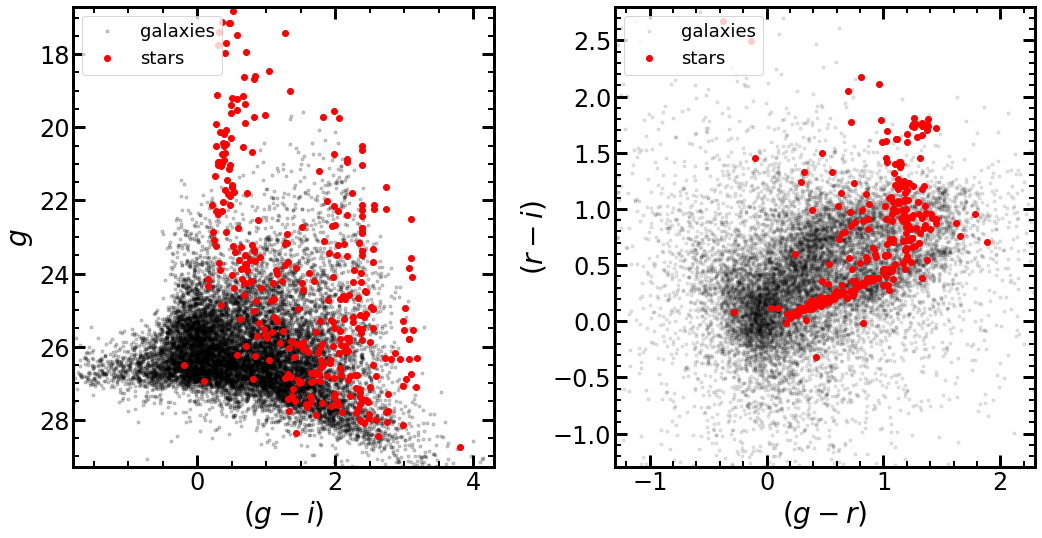

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

plt.sca(ax[0])  # set the first axis as current
# plt.rcParams.update({'figure.figsize' : (9, 11)})

plt.plot(truth_plus_meas[gx].mag_g_cModel - truth_plus_meas[gx].mag_i_cModel,
         truth_plus_meas[gx].mag_g_cModel, 'k.', alpha=0.2, label='galaxies')
plt.plot(truth_plus_meas[star].mag_g_cModel - truth_plus_meas[star].mag_i_cModel,
         truth_plus_meas[star].mag_g_cModel, 'ro', label='stars')
plt.legend(loc='upper left')
plt.xlabel(r'$(g-i)$')
plt.ylabel(r'$g$')
plt.xlim(-1.8, 4.3)
plt.ylim(29.3, 16.7)
plt.minorticks_on()

plt.sca(ax[1])  # set the first axis as current
plt.plot(truth_plus_meas[gx].mag_g_cModel - truth_plus_meas[gx].mag_r_cModel,
         truth_plus_meas[gx].mag_r_cModel - truth_plus_meas[gx].mag_i_cModel,
         'k.', alpha=0.1, label='galaxies')
plt.plot(truth_plus_meas[star].mag_g_cModel - truth_plus_meas[star].mag_r_cModel,
         truth_plus_meas[star].mag_r_cModel - truth_plus_meas[star].mag_i_cModel,
         'ro', label='stars')
plt.legend(loc='upper left')
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$(r-i)$')
plt.xlim(-1.3, 2.3)
plt.ylim(-1.3, 2.8)
plt.minorticks_on()

plt.tight_layout()
plt.show()

Looks pretty normal - the stellar locus in color-color space is right where one expects it to be, and the galaxies dominate at the faint end of the CMD. 

Now let's compare the fluxes:

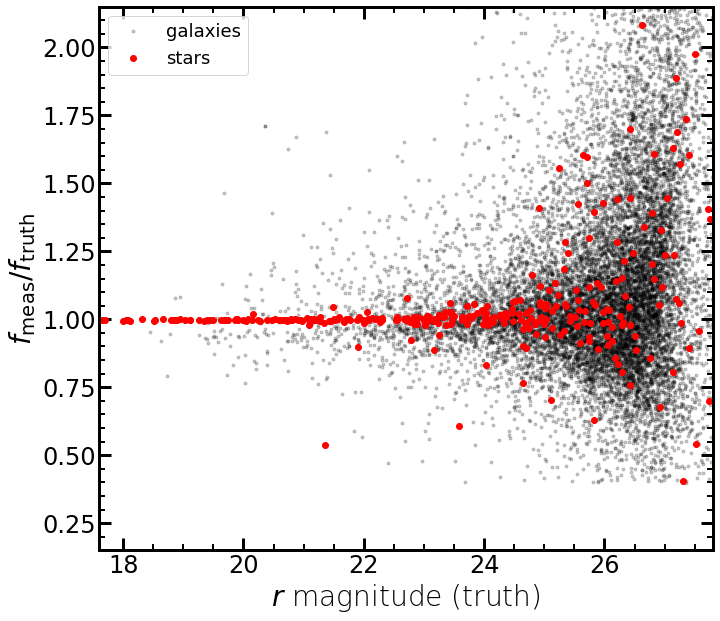

In [15]:
plt.rcParams.update({'figure.figsize': (11, 10)})

plt.plot(truth_plus_meas[gx].mag_r_truth,
         truth_plus_meas[gx].cModelFlux_r / truth_plus_meas[gx].flux_r,
         'k.', alpha=0.2, label='galaxies')
plt.plot(truth_plus_meas[star].mag_r_truth,
         truth_plus_meas[star].cModelFlux_r / truth_plus_meas[star].flux_r,
         'ro', label='stars')
plt.legend(loc='upper left')
plt.xlabel(r'$r$ magnitude (truth)')
plt.ylabel(r'$f_{\rm meas}/f_{\rm truth}$')
plt.ylim(0.15, 2.15)
plt.xlim(17.6, 27.8)
plt.minorticks_on()
plt.show()

Well, that looks good -- the ratio of measured to true fluxes is centered on 1.0. It seems like the fluxes are recovered pretty well, on average.

Congratulations! You have now learned how to compare measurements in the DP0.1 catalogs to the "true" simulated properties of objects. Have fun exploring more properties!